# Imports and setting up viz

NB : conda env1 on Mac, lam1env on spirit (Python3.12)

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#import personnal tools
import sys
sys.path.append('../../python_tools/')
from tools import *
from tools_mapping import *

In [2]:
rivers = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m',edgecolor=(0, 0, 0, 0.3), facecolor='none')

# Load files

LAM output analysis.

Simu irr et simu no-irr.

## Area and period selection

In [3]:
# lon_min=-13
# lon_max=6
# lat_min=32
# lat_max=49

date_min = '2010-01-01'
date_max = '2022-12-31'

## Sims

In [4]:
# noirr_dir='../../../JZ_simu_outputs/LAM/LAM_1000_40/noirr_2010_2022'
# irr_dir='../../../JZ_simu_outputs/LAM/LAM_1000_40/irr_2010_2022'
noirr_dir='../../../JZ_simu_outputs/LAM/LAM_1500_60/noirr'
irr_dir='../../../JZ_simu_outputs/LAM/LAM_1500_60/irr'

In [5]:
TS_flag=False

In [7]:
#open netcdf files
if TS_flag:
    filename = '{}/*/SRF/TS_MO/*.nc'.format(noirr_dir)
elif not TS_flag:
    filename = '{}/*/SRF/MO/*sechiba_history.nc'.format(noirr_dir)

ORCnoirr0 = xr.open_mfdataset(filename)
ORCnoirr = ORCnoirr0.rename({'time_counter':'time'})
ORCnoirr.attrs['name'] = 'no_irr'
ORCnoirr.attrs['plot_color'] = "red"
ORCnoirr = ORCnoirr.sel(lon=slice(lon_min,lon_max),lat=slice(lat_min,lat_max))

ORCnoirr['snowmelt'] = ORCnoirr['snowmelt'] * 24 * 3600
ORCnoirr['snowmelt'].attrs['units'] = 'mm/day'

ORCnoirr['snow_contrib'] = ORCnoirr['snowmelt'] / (ORCnoirr['snowmelt'] + ORCnoirr['rain']) * 100
ORCnoirr['snow_contrib'].attrs['units'] = '%'

ORCnoirr

<xarray.Dataset>
Dimensions:                 (lat: 35, lon: 49, veget: 15, soiltyp: 3,
                             solth: 18, nobio: 1, solay: 11, snowlev: 3,
                             albtyp: 2, time: 156, axis_nbounds: 2)
Coordinates:
  * lat                     (lat) float32 35.69 35.93 36.17 ... 43.62 43.87
  * lon                     (lon) float32 -9.899 -9.615 -9.33 ... 3.468 3.752
  * veget                   (veget) float32 1.0 2.0 3.0 4.0 ... 13.0 14.0 15.0
  * soiltyp                 (soiltyp) float32 1.0 2.0 3.0
  * solth                   (solth) float32 0.0004888 0.001955 ... 33.53 65.56
  * nobio                   (nobio) float32 1.0
  * solay                   (solay) float32 0.0 0.001955 0.005865 ... 0.999 2.0
  * snowlev                 (snowlev) float32 1.0 2.0 3.0
  * albtyp                  (albtyp) float32 1.0 2.0
    time_centered           (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time                    (time) datetime64[ns] 2010-01-16T12:00:00 ... 202...
Dimensions without coordinates: axis_nbounds
Data variables: (12/123)
    time_centered_bounds    (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds     (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    Areas                   (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    Contfrac                (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    swnet                   (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    lwnet                   (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    ...                      ...
    delfastr_daily          (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    delslowr_daily          (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    delstreamr_daily        (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    delstock_routing_daily  (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    soilalb_bg              (time, albtyp, lat, lon) float32 dask.array<chunksize=(1, 2, 35, 49), meta=np.ndarray>
    snow_contrib            (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
Attributes:
    name:         no_irr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Oct-24 16:52:37 GMT
    uuid:         58fb7df4-6705-43ed-8adf-55b70a468dac
    plot_color:   red

In [9]:
if TS_flag:
    filename = '{}/*/SRF/TS_MO/*.nc'.format(noirr_dir)
elif not TS_flag:
    filename = '{}/*/SRF/MO/*history.nc'.format(irr_dir)

ORCirr0 = xr.open_mfdataset(filename)
ORCirr = ORCirr0.rename({'time_counter':'time'})
ORCirr.attrs['name'] = 'irr'
ORCirr.attrs['plot_color'] = "#0C5DA5"
ORCirr = ORCirr.sel(lon=slice(lon_min,lon_max),lat=slice(lat_min,lat_max))

ORCirr['snowmelt'] = ORCirr['snowmelt'] * 24 * 3600
ORCirr['snowmelt'].attrs['units'] = 'mm/day'

ORCirr

<xarray.Dataset>
Dimensions:                 (lat: 35, lon: 49, veget: 15, soiltyp: 3,
                             solth: 18, nobio: 1, solay: 11, snowlev: 3,
                             albtyp: 2, time: 156, axis_nbounds: 2)
Coordinates:
  * lat                     (lat) float32 35.69 35.93 36.17 ... 43.62 43.87
  * lon                     (lon) float32 -9.899 -9.615 -9.33 ... 3.468 3.752
  * veget                   (veget) float32 1.0 2.0 3.0 4.0 ... 13.0 14.0 15.0
  * soiltyp                 (soiltyp) float32 1.0 2.0 3.0
  * solth                   (solth) float32 0.0004888 0.001955 ... 33.53 65.56
  * nobio                   (nobio) float32 1.0
  * solay                   (solay) float32 0.0 0.001955 0.005865 ... 0.999 2.0
  * snowlev                 (snowlev) float32 1.0 2.0 3.0
  * albtyp                  (albtyp) float32 1.0 2.0
    time_centered           (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time                    (time) datetime64[ns] 2010-01-16T12:00:00 ... 202...
Dimensions without coordinates: axis_nbounds
Data variables: (12/130)
    time_centered_bounds    (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds     (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    Areas                   (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    Contfrac                (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    swnet                   (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    lwnet                   (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    ...                      ...
    DelSWE_daily            (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    delfastr_daily          (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    delslowr_daily          (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    delstreamr_daily        (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    delstock_routing_daily  (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    soilalb_bg              (time, albtyp, lat, lon) float32 dask.array<chunksize=(1, 2, 35, 49), meta=np.ndarray>
Attributes:
    name:         irr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Oct-24 16:54:51 GMT
    uuid:         3b44d854-98f3-4d70-81de-20074bb33431
    plot_color:   #0C5DA5

In [10]:
if not TS_flag:
    # #manually define irrig_deficit as netirrig-irrigation in ORC file
    # ORCirr['irrig_deficit'] = ORCirr['netirrig'] - ORCirr['irrigation']
    # #make irrig_deficit units mm/day
    # ORCirr['irrig_deficit'].attrs['units'] = 'mm/day'
    # ORCirr['irrig_frac'] = ORCirr['irrigmap_dyn']/ORCirr['Areas']

    ORCnoirr['irrig_frac'] = ORCirr['irrigmap_dyn']/ORCirr['Areas'] * 100
    ORCnoirr['irrig_frac'].attrs['units'] = '%'
    ORCirr['irrig_frac'] = ORCirr['irrigmap_dyn']/ORCirr['Areas'] * 100
    ORCirr['irrig_frac'].attrs['units'] = '%'

## Obs

### Irrigation

In [11]:
load_Ebro_obs=False

In [12]:
if (load_Ebro_obs):
    filename = '../../../obs/SM_based_inversion_approach_EBRO_Irrigation.nc'
    obsEbro = xr.open_dataset(filename)
    obsEbro = obsEbro.rename({'Time':'time'})
    obsEbro = obsEbro.rename({'Longitude':'lon'})
    obsEbro = obsEbro.rename({'Latitude':'lat'})
    obsEbro = obsEbro.rename({'Irrigation':'irrigation'})
    #make lon and lat coordinates and not variables
    # obsEbro = obsEbro.set_coords(['lon','lat'])

    obsEbro = regrid_to_lon_lat(obsEbro)
    obsEbro.attrs['name'] = 'obs_Ebro'
    obsEbro.attrs['plot_color'] = "black"

    #convert to mm/day
    obsEbro['irrigation'] = obsEbro['irrigation']/30
    obsEbro['irrigation'].attrs['units'] = 'mm/d'
    obsEbro['irrigation'].attrs['long_name'] = 'Irrigation'
    
    #resample obsEbro to monthly values
    obsEbro = obsEbro.resample(time='1M').mean()
    
    obsEbro

### GLEAM v4

In [13]:
filename = '../../../obs/GLEAMv4.1a/SM/SMs*'
gleamSMs = xr.open_mfdataset(filename)
gleamSMs.attrs['name'] = 'GLEAMv4.1a_SMs'
gleamSMs.attrs['plot_color'] = "green"
#restrict lon lat
gleamSMs = gleamSMs.sel(lon=slice(lon_min,lon_max),lat=slice(lat_max,lat_min))
#rename var SM
gleamSMs = gleamSMs.rename({'SMs':'SM'})
gleamSMs['SM'].attrs['units'] = 'm3/m3'

#obtain mrsos and humtot equivalent (mm)
gleamSMs['mrsos'] = gleamSMs['SM'] * 0.1 * 1000
gleamSMs['mrsos'].attrs['units'] = 'mm'
gleamSMs['humtot'] = gleamSMs['SM'] * 2 * 1000
gleamSMs['humtot'].attrs['units'] = 'mm'

gleamSMs

<xarray.Dataset>
Dimensions:  (time: 156, lon: 140, lat: 85)
Coordinates:
  * time     (time) datetime64[ns] 2010-01-31 2010-02-28 ... 2022-12-31
  * lon      (lon) float64 -9.95 -9.85 -9.75 -9.65 -9.55 ... 3.65 3.75 3.85 3.95
  * lat      (lat) float64 43.95 43.85 43.75 43.65 ... 35.85 35.75 35.65 35.55
Data variables:
    SM       (time, lat, lon) float32 dask.array<chunksize=(12, 85, 140), meta=np.ndarray>
    mrsos    (time, lat, lon) float32 dask.array<chunksize=(12, 85, 140), meta=np.ndarray>
    humtot   (time, lat, lon) float32 dask.array<chunksize=(12, 85, 140), meta=np.ndarray>
Attributes:
    name:        GLEAMv4.1a_SMs
    plot_color:  green

In [14]:
filename = '../../../obs/GLEAMv4.1a/SM/SMrz*'
gleamSMrz = xr.open_mfdataset(filename)
gleamSMrz.attrs['name'] = 'GLEAMv4.1a_SMrz'
gleamSMrz.attrs['plot_color'] = "green"
#restrict lon lat
gleamSMrz = gleamSMrz.sel(lon=slice(lon_min,lon_max),lat=slice(lat_max,lat_min))
#rename var SM
gleamSMrz = gleamSMrz.rename({'SMrz':'SM'})
gleamSMrz['SM'].attrs['units'] = 'm3/m3'

#obtain mrsos and humtot equivalent (mm)
gleamSMrz['mrsos'] = gleamSMrz['SM'] * 0.1 * 1000
gleamSMrz['mrsos'].attrs['units'] = 'mm'
gleamSMrz['humtot'] = gleamSMrz['SM'] * 2 * 1000
gleamSMrz['humtot'].attrs['units'] = 'mm'

gleamSMrz

<xarray.Dataset>
Dimensions:  (time: 156, lon: 140, lat: 85)
Coordinates:
  * time     (time) datetime64[ns] 2010-01-31 2010-02-28 ... 2022-12-31
  * lon      (lon) float64 -9.95 -9.85 -9.75 -9.65 -9.55 ... 3.65 3.75 3.85 3.95
  * lat      (lat) float64 43.95 43.85 43.75 43.65 ... 35.85 35.75 35.65 35.55
Data variables:
    SM       (time, lat, lon) float32 dask.array<chunksize=(12, 85, 140), meta=np.ndarray>
    mrsos    (time, lat, lon) float32 dask.array<chunksize=(12, 85, 140), meta=np.ndarray>
    humtot   (time, lat, lon) float32 dask.array<chunksize=(12, 85, 140), meta=np.ndarray>
Attributes:
    name:        GLEAMv4.1a_SMrz
    plot_color:  green

In [15]:
filename = '../../../obs/GLEAMv4.1a/E/*'
gleamE = xr.open_mfdataset(filename)
gleamE.attrs['name'] = 'GLEAMv4.1a'
gleamE.attrs['plot_color'] = "green"
#restrict lon lat
gleamE = gleamE.sel(lon=slice(lon_min,lon_max),lat=slice(lat_max,lat_min))
#rename var SM
gleamE['evap']=gleamE['E'] / 31
gleamE['evap'].attrs['units'] = 'mm/d'
gleamE

<xarray.Dataset>
Dimensions:  (time: 156, lon: 140, lat: 85)
Coordinates:
  * time     (time) datetime64[ns] 2010-01-31 2010-02-28 ... 2022-12-31
  * lon      (lon) float64 -9.95 -9.85 -9.75 -9.65 -9.55 ... 3.65 3.75 3.85 3.95
  * lat      (lat) float64 43.95 43.85 43.75 43.65 ... 35.85 35.75 35.65 35.55
Data variables:
    E        (time, lat, lon) float32 dask.array<chunksize=(12, 85, 140), meta=np.ndarray>
    evap     (time, lat, lon) float32 dask.array<chunksize=(12, 85, 140), meta=np.ndarray>
Attributes:
    name:        GLEAMv4.1a
    plot_color:  green

### ERA5-Land

In [16]:
load_EraLand=False

In [17]:
if load_EraLand:
    filename = '../../../obs/ERA5-Land.nc'
    eraland = xr.open_dataset(filename)
    eraland.attrs['name'] = 'ERA5-Land'
    rename_dict = {'longitude':'lon',
                'latitude':'lat',
                'valid_time':'time',
                'skt':'temp_sol',
                'sro':'runoff',
                'ro':'mrro',
                'ssr':'SW_net',
                'str':'LW_net',
                'sshf':'fluxsens',
                'slhf':'fluxlat',
                'tp':'precip',
                'src':'fastr'
                }
    eraland = eraland.rename(rename_dict)

    eraland['mrsos'] = eraland['swvl1']*0.1*1000
    eraland['mrsos'].attrs['units'] = 'mm'
    #average variables swl1 to swvl4
    eraland['lvl1-4_ave'] = (eraland['swvl1'] * 7 + eraland['swvl2'] * 21 + eraland['swvl3'] * 72 + eraland['swvl4'] * 189 )  / 289
    eraland['humtot'] = eraland['lvl1-4_ave']*2*1000
    eraland['humtot'].attrs['units'] = 'mm'

    eraland['evap'] = eraland['fluxlat'] * 0.408 * 0.0864
    eraland['evap'].attrs['units'] = 'mm/d'

    eraland

### ERA5

In [18]:
#open ERA5 file
# filename = '../../../obs/ERA5_eval_2010_2022.nc'
filename = '../../../obs/ERA5/ERA5_large_eval.nc'

era = xr.open_mfdataset(filename)
era.attrs['name'] = 'ERA5'
era.attrs['plot_color'] = "red"
#define or edit vars
#name ERA5 vars like in LMDZOR outputs
dict =  {
        'longitude':'lon',
        'latitude':'lat',
        'e':'evap',
        'ro':'totrunoff',
        'tp':'precip',
        'u10':'u10m',
        'v10':'v10m',
        'p71.162' : 'uq',
        'p72.162' : 'vq',
        'sshf' : 'fluxsens',
        'slhf' : 'fluxlat',
        'si10' : 'sfcWind',
        'ssrd' : 'SWdnSFC',
        'strd' : 'LWdnSFC',
        'ssr' : 'SWnetSFC',
        'str' : 'LWnetSFC',
        }
era = era.rename(dict)
era=era.sel(time=slice(date_min, date_max))
era = era.sel(lon=slice(lon_min,lon_max),lat=slice(lat_max, lat_min))

#make evap positive in era
era['evap'] = -era['evap'] * 1000
era['evap'].attrs['units'] = 'mm/d'
era['precip'] = era['precip']*1000
era['precip'].attrs['units'] = 'mm/d'

era


<xarray.Dataset>
Dimensions:    (lon: 57, lat: 35, time: 156)
Coordinates:
  * lon        (lon) float32 -10.0 -9.75 -9.5 -9.25 -9.0 ... 3.25 3.5 3.75 4.0
  * lat        (lat) float32 44.0 43.75 43.5 43.25 ... 36.25 36.0 35.75 35.5
  * time       (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2022-12-01
Data variables: (12/20)
    u10m       (time, lat, lon) float32 dask.array<chunksize=(156, 35, 57), meta=np.ndarray>
    v10m       (time, lat, lon) float32 dask.array<chunksize=(156, 35, 57), meta=np.ndarray>
    t2m        (time, lat, lon) float32 dask.array<chunksize=(156, 35, 57), meta=np.ndarray>
    cp         (time, lat, lon) float32 dask.array<chunksize=(156, 35, 57), meta=np.ndarray>
    evap       (time, lat, lon) float32 dask.array<chunksize=(156, 35, 57), meta=np.ndarray>
    lsp        (time, lat, lon) float32 dask.array<chunksize=(156, 35, 57), meta=np.ndarray>
    ...         ...
    precip     (time, lat, lon) float32 dask.array<chunksize=(156, 35, 57), meta=np.ndarray>
    p84.162    (time, lat, lon) float32 dask.array<chunksize=(156, 35, 57), meta=np.ndarray>
    uq         (time, lat, lon) float32 dask.array<chunksize=(156, 35, 57), meta=np.ndarray>
    vq         (time, lat, lon) float32 dask.array<chunksize=(156, 35, 57), meta=np.ndarray>
    vimd       (time, lat, lon) float32 dask.array<chunksize=(156, 35, 57), meta=np.ndarray>
    sfcWind    (time, lat, lon) float32 dask.array<chunksize=(156, 35, 57), meta=np.ndarray>
Attributes:
    Conventions:                CF-1.6
    history:                    Tue Sep 24 09:53:59 2024: ncks -A -v si10 ERA...
    history_of_appended_files:  Tue Sep 24 09:53:59 2024: Appended file ERA5_...
    NCO:                        netCDF Operators version 5.0.6 (Homepage = ht...
    name:                       ERA5
    plot_color:                 red

### CCI

In [19]:
load_CCI=False

In [20]:
if load_CCI:
    filename = '../../../obs/CCI-SM/C3S*.nc'
    cci = xr.open_mfdataset(filename)
    cci.attrs['name'] = 'CCI'

    cci = cci.sel(lon=slice(lon_min,lon_max),lat=slice(lat_max,lat_min))

    cci['humtot'] = cci['sm'] * 2 * 1000
    cci['humtot'].attrs['units'] = 'mm'
    cci['mrsos'] = cci['sm'] * 0.1 * 1000
    cci['mrsos'].attrs['units'] = 'mm'

    cci

## Period selection

In [21]:
#select only JJA
# ORCnoirr = ORCnoirr.sel(time=ORCnoirr['time.season']=='JJA')
# ORCirr = ORCirr.sel(time=ORCirr['time.season']=='JJA')

In [22]:
if (load_Ebro_obs):
    #match the period of Ebro data
    date_min='2016-01-01'
    date_max='2020-07-31'

    ORCnoirr = ORCnoirr.sel(time=slice(date_min,date_max))
    ORCirr = ORCirr.sel(time=slice(date_min,date_max))
    obsEbro = obsEbro.sel(time=slice(date_min,date_max))

## Interpolation and masks

In [23]:
#create a masks of data points where irrig_frac >5%
irr_mask = (ORCirr['irrigmap_dyn']/ORCirr['Areas'])>0.05
con_mask=ORCnoirr['Contfrac']>0.95
ip_mask=polygon_to_mask(ORCnoirr, iberian_peninsula)

In [24]:
#iberian peninsula ds
ip_ORCnoirr=ORCnoirr.where(con_mask).where(ip_mask)
ip_ORCirr=ORCirr.where(con_mask).where(ip_mask)

In [25]:
#mask on irrigated areas only
irr_ORCirr=ORCirr.where(irr_mask)
irr_ORCnoirr=ORCnoirr.where(irr_mask)

ip_irr_ORCirr=ip_ORCirr.where(irr_mask)
ip_irr_ORCnoirr=ip_ORCnoirr.where(irr_mask)

In [26]:
if (load_Ebro_obs):
    ebro_mask = obsEbro['irrigation']>0
    ORCirr_iObsEbro = ORCirr.interp_like(obsEbro)
    ebro_ORCirr_iObsEbro = ORCirr_iObsEbro.where(ebro_mask)
    obsEbro_iORC = obsEbro.interp_like(ORCirr)
    ebro_mask_iORCirr = obsEbro_iORC['irrigation']>0
    ebro_ORCirr = ORCirr.where(ebro_mask_iORCirr)

In [27]:
#interpolate gleam to sim grid
gleamSMs_iORC = gleamSMs.interp_like(ORCnoirr)
gleamSMrz_iORC = gleamSMrz.interp_like(ORCnoirr)
gleamE_iORC = gleamE.interp_like(ORCnoirr)
#mask on Iberian Peninsula
ip_gleamSMs_iORC = gleamSMs_iORC.where(ip_mask)
ip_gleamSMrz_iORC = gleamSMrz_iORC.where(ip_mask)
ip_gleamE_iORC = gleamE_iORC.where(ip_mask)
#mask on irrigated areas only
ip_irr_gleamSMs_iORC = ip_gleamSMs_iORC.where(irr_mask)
ip_irr_gleamSMrz_iORC = ip_gleamSMrz_iORC.where(irr_mask)
ip_irr_gleamE_iORC = ip_gleamE_iORC.where(irr_mask)

In [28]:
if load_CCI:
    #interpolate CCI to sim grid
    cci_iORC = cci.interp_like(ORCnoirr)
    #mask on Iberian Peninsula
    ip_cci_iORC = cci_iORC.where(ip_mask)

In [29]:
if load_EraLand:
    #interpolate eraland to sim grid
    eraland_iORC = eraland.interp_like(ORCnoirr)
    #mask on Iberian Peninsula
    ip_eraland_iORC = eraland_iORC.where(ip_mask)

In [30]:
#interpolate era to sim grid and apply ip and irr masks
era_iORC = era.interp_like(ORCnoirr)
#mask on Iberian Peninsula
ip_era_iORC = era_iORC.where(ip_mask)
#mask on irrigated areas only
ip_irr_era_iORC = ip_era_iORC.where(irr_mask)

In [31]:
if not (load_Ebro_obs):
    ebro_mask = polygon_to_mask(ORCnoirr, ebro)
    ebro_ORCirr = ip_ORCirr.where(ebro_mask['mask'])
    ebro_ORCnoirr = ip_ORCnoirr.where(ebro_mask['mask'])
    ebro_gleamE_iORC = ip_gleamE_iORC.where(ebro_mask['mask'])
    ebro_era_iORC = ip_era_iORC.where(ebro_mask['mask'])
    ebro_irr_ORCirr = ebro_ORCirr.where(irr_mask)
    ebro_irr_ORCnoirr = ebro_ORCnoirr.where(irr_mask)
    ebro_irr_gleamE_iORC = ebro_gleamE_iORC.where(irr_mask)
    ebro_irr_era_iORC = ebro_era_iORC.where(irr_mask)

KeyError: 'mask'

## Diff datasets

In [30]:
#irr - noirr
sim_diff = ORCirr - ORCnoirr
sim_diff.attrs['name'] = 'irr - noirr'
ip_sim_diff = ip_ORCirr - ip_ORCnoirr
ip_sim_diff.attrs['name'] = 'irr - noirr'

#mean
sim_diff_mean = sim_diff.mean(dim='time')
sim_diff_mean.attrs['name'] = 'irr - noirr mean'
ip_sim_diff_mean = ip_sim_diff.mean(dim='time')
ip_sim_diff_mean.attrs['name'] = 'irr - noirr mean'

# Maps

/home/ptiengou/miniconda3/envs/env1/lib/python3.12/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/ptiengou/miniconda3/envs/env1/lib/python3.12/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


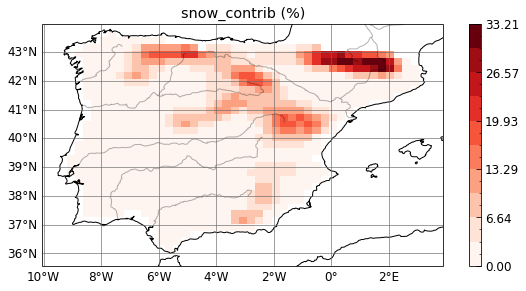

In [33]:
ds=ip_ORCnoirr
var='snow_contrib'
vmin = 0
vmax = 2
# vmin, vmax = None, None
vmax=None

title='Irrigation (for grid cells with irrig_frac >0.1%, +IP mask, mm/d)'
title=None

map_ave(ds, var, vmin=vmin, vmax=vmax, title=title, cmap=reds, poly=None)

In [ ]:
#diff
ds1=ORCirr_iObsEbro
ds2=obsEbro
var='irrigation'
vmax= 0.5
vmin=-0.5
# vmin, vmax=None, None
# title='Sensible heat flux difference (irr-no_irr, JJA, W/m²)'
title=None
cmap=emb_neutral
map_diff_ave(ds1, ds2, var,cmap=cmap, title=title, vmin=vmin, vmax=vmax)

In [ ]:
#diff with significance
ds1=ORCirr   
ds2=ORCnoirr
var='evap'
vmax= 40
vmin=-40
vmin, vmax=None, None
title='Sensible heat flux difference (irr-no_irr, JJA, W/m²)'
title=None
map_diff_ave(ds1, ds2, var, title=title, vmin=vmin, vmax=vmax, sig=True)

In [ ]:
#relative difference
ds1=ip_ORCirr
ds2=ip_ORCnoirr
var='streamr'
vmax= 100
vmin=-100
map_rel_diff_ave(ds1, ds2, var,cmap=emb_neutral, vmin=vmin, vmax=vmax)

In [ ]:
#Display map of var for ds on restricted area
var='soiltile'
ds = ebro_ORCirr
latmin=39.75
latmax=44.1
lonmin= -4.5
lonmax= 2.5
# latmin=41.
# latmax=42.5
# lonmin= 0.
# lonmax= 1.5

#restrict ds to latmin, latmax, lonmin, lonmax
ds = ds.where(ds.lat >= latmin, drop=True).where(ds.lat <= latmax, drop=True)
ds = ds.where(ds.lon >= lonmin, drop=True).where(ds.lon <= lonmax, drop=True)
plotvar = ds[var].mean(dim='time')
map_plotvar(plotvar, cmap=wet, vmin=0, vmax=0.8, title='Applied irrigation (mm/day)')

In [ ]:
#Display diff of var for ds on restricted area
var='irrigation'
ds1 = ORCirr
ds2 = obsEbro_iORC
latmin=39.75
latmax=44.1
lonmin= -4.5
lonmax= 2.5
# latmin=41.
# latmax=42.5
# lonmin= 0.
# lonmax= 1.5

#restrict ds to latmin, latmax, lonmin, lonmax
ds1 =ds1.where(ds1.lat >= latmin, drop=True).where(ds1.lat <= latmax, drop=True)
ds1 =ds1.where(ds1.lon >= lonmin, drop=True).where(ds1.lon <= lonmax, drop=True)
ds2 =ds2.where(ds2.lat >= latmin, drop=True).where(ds2.lat <= latmax, drop=True)
ds2 =ds2.where(ds2.lon >= lonmin, drop=True).where(ds2.lon <= lonmax, drop=True)

vmin=-0.5
vmax= 0.5
# vmin, vmax = None, None
map_diff_ave(ds1, ds2, var, vmin=vmin, vmax=vmax)

In [ ]:
#display seasonal maps of var
ds=ip_ORCirr
var='drainage'
vmin = 0
vmax = 6
# vmin, vmax = None, None
# vmax=None

title='Irrigation (for grid cells with irrig_frac >0.1%, +IP mask, mm/d)'
title='{} ({})'.format(ds[var].attrs['long_name'], ds[var].attrs['units'])

map_seasons(ds[var], vmin=vmin, vmax=vmax, title=title, cmap=wet)

In [ ]:
#Display map of 3D var over one dimension
var='soiltile'
ds = ORCirr
dim_nb=0
title=var + str(dim_nb+1)
plotvar = ds[var][:,dim_nb,:,:].mean(dim='time')
map_plotvar(plotvar, cmap=reds, vmin=0, vmax=1, title=title)

# Time series

/home/ptiengou/miniconda3/envs/env1/lib/python3.12/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/ptiengou/miniconda3/envs/env1/lib/python3.12/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


no_irr : 4.08 (%)


/home/ptiengou/miniconda3/envs/env1/lib/python3.12/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


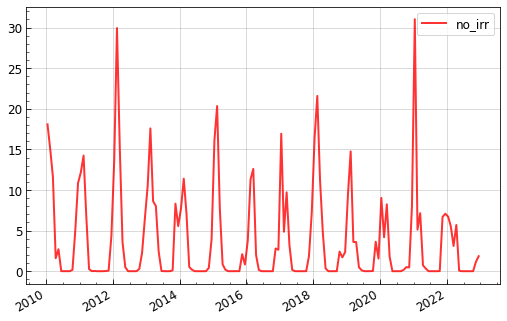

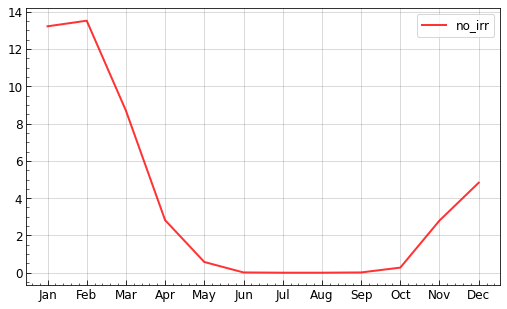

In [35]:
var='snow_contrib'

ds1=ip_ORCirr
ds2=ip_ORCnoirr

# ds1 = ebro_irr_ORCnoirr
# ds2 = ebro_irr_ORCirr
# ds3 = ebro_irr_gleamE_iORC
# ds4 = ebro_irr_era_iORC

# ds_list = [ds1, ds2, ds3, ds4]
ds_list=[ds2]#, ds2]

year_min = 2010
year_max = 2022
title='Ebro irrigated areas average evaporation (mm/day)'
title='Average irrigation requirement (irrigated grid cells only, mm/day)'
title=var + ' (irrigated grid cells only)'
title='nope'
time_series_ave(ds_list, var, ds_colors=True, year_min=year_min, year_max=year_max, title=title)
seasonal_cycle_ave(ds_list, var, ds_colors=True, year_min=year_min, year_max=year_max, title=title)

In [ ]:
ds=ORCirr
ds_list=[ds]
var='streamr'
lon=-3
lat=41
time_series_lonlat(ds_list, var, lon, lat)

# Scatter plots

In [ ]:
var1='irrig_frac'
ds1=ip_ORCirr
# ds1=ds1.where(mask)

var2='netirrig'
ds2=ds1
# ds2=ds2.where(mask)

scatter_annual_mean(ds1, ds2, var1, var2, reg=True)

In [ ]:
var1='irrig_frac'
ds1=ip_ORCirr
# mask=irr_mask
# ds1=ds1.where(mask)

var2='netirrig'
ds2=ip_ORCirr
# ds2=ds2.where(mask)

seasons=['DJF','MAM', 'JJA', 'SON']
seasons=['SON']

scatter_vars_seasons(ds1, ds2, var1, var2, reg=True, coloring=True, seasons_list=seasons)

## With spatial aggregation

In [ ]:
var1='irrigation'
ds1=ip_ORCirr.mean(dim='lon').mean(dim='lat')
# mask=irr_mask
# ds1=ds1.where(mask)

var2='evap'
ds2=ip_sim_diff.mean(dim='lon').mean(dim='lat')
# ds2=ds2.where(mask)

scatter_vars(ds1, ds2, var1, var2, reg=True)

In [ ]:
var1='irrigation'
ds1=ip_ORCnoirr.mean(dim='lon').mean(dim='lat')
# mask=irr_mask
# ds1=ds1.where(mask)

var2='evap'
ds2=ip_sim_diff.mean(dim='lon').mean(dim='lat')
# ds2=ds2.where(mask)
months=[1,7,10]
scatter_vars_months(ds1, ds2, var1, var2, reg=False, coloring=True)